In [1]:
#import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the train and test data
train_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       header = None)

In [3]:
test_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows = 1, 
                      header = None)

In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
              'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
              'native_country', 'wage_class']

In [5]:
train_set.columns=col_labels
test_set.columns=col_labels

In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
train_set.shape,test_set.shape

((32561, 15), (16281, 15))

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [11]:
train_set.get_dtype_counts()

int64     6
object    9
dtype: int64

In [12]:
test_set.get_dtype_counts()

int64     6
object    9
dtype: int64

In [13]:
##Clean the  data
##1.Clean the column names
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [14]:
test_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

## The columns don't have any nonsensical values, therefore there is no need to clean or change column names

In [15]:
#deveide the Numerical and Non Numerical columns
num_cols = train_set.select_dtypes(include=['int64']).columns.values

In [16]:
num_cols

array(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'], dtype=object)

In [17]:
#2.Check the Null Value
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [18]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

# As per the above analysis there is no Null values in the data set

In [19]:
#Zeros:Check if there are any rows with all row values = zero that need our consideration so that we can decide to study those rows

train_set.loc[(train_set==0).all(axis=1),num_cols].shape


(0, 6)

In [20]:
test_set.loc[(test_set==0).all(axis=1),num_cols].shape

(0, 6)

### There are no rows which have all row values == 0



In [21]:
#Check if there are any rows with any row values = zero that need our consideration so that we can decide to study those rows
train_set.loc[(train_set==0).any(axis=1),num_cols].shape

(32561, 6)

In [22]:
train_set.loc[(train_set==0).any(axis=1),num_cols].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [23]:
train_set.loc[(train_set.drop(["capital_gain", "capital_loss"],axis=1)==0).any(axis=1),num_cols].shape

(0, 6)

In [24]:
test_set.loc[(train_set==0).any(axis=1),num_cols].shape

(16281, 6)

In [25]:
test_set.loc[(test_set.drop(["capital_gain", "capital_loss"],axis=1)==0).any(axis=1),num_cols].shape

(0, 6)

#### No rows which have any row values == 0, except in captital_gain, capital_loss columns(where 0 is a valid value)

In [26]:
num_com = train_set.select_dtypes(exclude=['object']).columns.values
num_com

array(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'], dtype=object)

In [27]:
#3.Nonsensical values
#There are no nonsensical values in the Numerical Columns,need to check in the categorical columns
#first to know what are the Non Numeric columns are available
cate_cols = train_set.select_dtypes(include=['object']).columns.values
cate_cols

array(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype=object)

In [28]:
train_set[cate_cols].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
wage_class        0
dtype: int64

In [29]:
test_set[cate_cols].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
wage_class        0
dtype: int64

In [30]:
##Checking empty valyes
train_set.loc[(train_set=="").any(axis=1),cate_cols].shape

(0, 9)

In [31]:
test_set.loc[(train_set=="").any(axis=1),cate_cols].shape

(0, 9)

#### so no empty values present in the categorical columns data

In [32]:
train_set[cate_cols].nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
wage_class         2
dtype: int64

In [33]:
for col in cate_cols:
    print(train_set[col].unique(),"\n")

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

[' Male' ' Female'] 

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canad

In [34]:
test_set[cate_cols].nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    41
wage_class         2
dtype: int64

In [35]:
for col in cate_cols:
    print(test_set[col].unique(),"\n")

[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool'] 

[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse'] 

[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces'] 

[' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative'] 

[' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo'] 

[' Male' ' Female'] 

[' United-States' ' ?' ' Peru' ' Guatemala' ' Mexico'
 ' Dominican-Republic' ' Ireland' ' Germany' ' Philippines' ' 

###### Columns workclass, occupation and native_country have rows that have garbage values which need to be imputed or dropped in the train_set

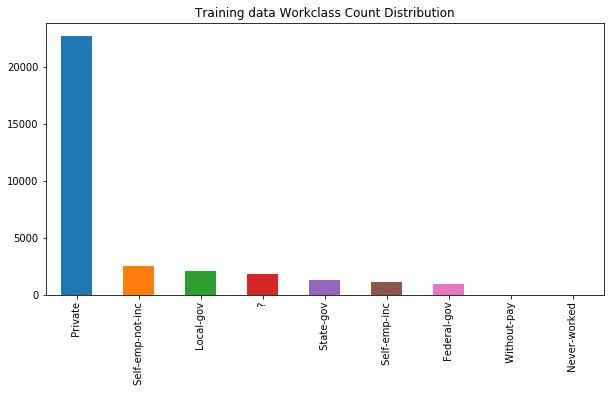

In [36]:
plt.figure(figsize=(10,5))
#plt.subplot(2,2,1) 
plt.title("Training data Workclass Count Distribution")
train_set['workclass'].value_counts().plot.bar()


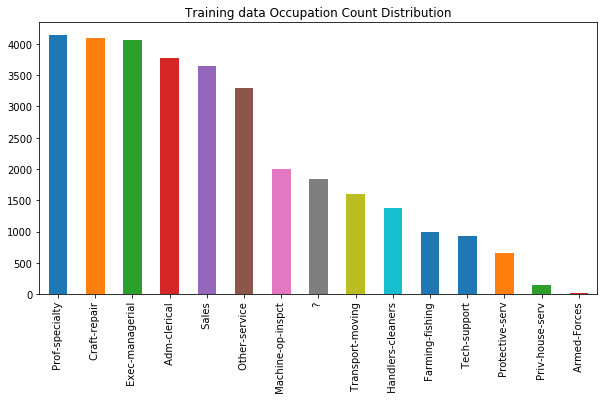

In [37]:
plt.figure(figsize=(10,5))
plt.title("Training data Occupation Count Distribution")
train_set['occupation'].value_counts().plot.bar()

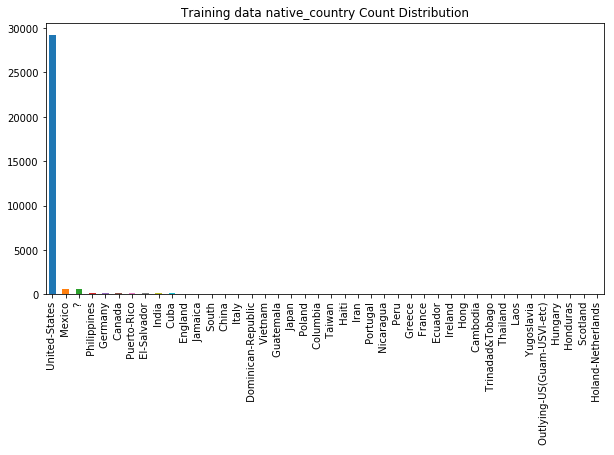

In [38]:
plt.figure(figsize=(10,5))
plt.title("Training data native_country Count Distribution")
train_set['native_country'].value_counts().plot.bar()

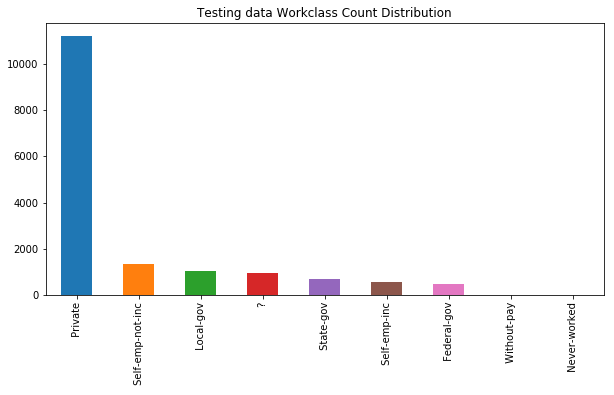

In [39]:
plt.figure(figsize=(10,5))
#plt.subplot(2,2,1) 
plt.title("Testing data Workclass Count Distribution")
test_set['workclass'].value_counts().plot.bar()

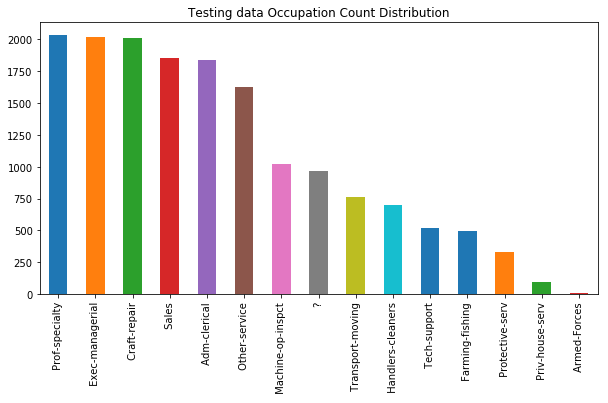

In [40]:
plt.figure(figsize=(10,5))
plt.title("Testing data Occupation Count Distribution")
test_set['occupation'].value_counts().plot.bar()

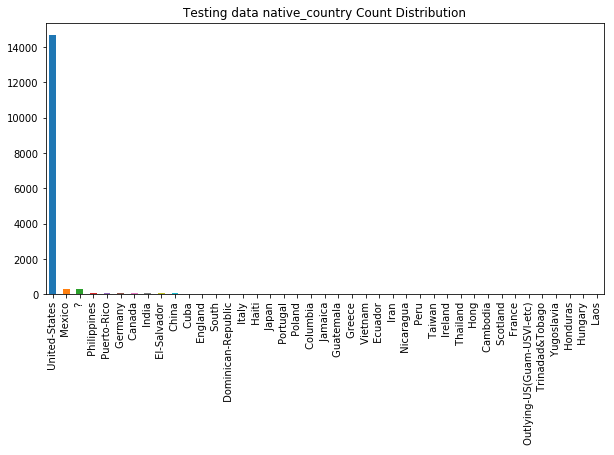

In [41]:
plt.figure(figsize=(10,5))
plt.title("Testing data native_country Count Distribution")
test_set['native_country'].value_counts().plot.bar()

In [42]:
(train_set.loc[(train_set==" ?").any(axis=1),cate_cols].shape[0]/train_set.shape[0])*100

7.367709836921471

In [43]:
(test_set.loc[(test_set==" ?").any(axis=1),cate_cols].shape[0]/test_set.shape[0])*100

7.499539340335361

#### If we drop the rows containing ? values, we incur a data loss of approximately 7.5% data loss in the train_set and the test_set. Therefore we choose to drop it

In [44]:
##now drop the "?" columns 
train_set.drop(train_set.loc[(train_set==" ?").any(axis=1)].index, inplace= True)
train_set.shape[0]

30162

In [45]:
test_set.drop(test_set.loc[(test_set==" ?").any(axis=1)].index, inplace= True)
test_set.shape[0]

15060

In [46]:
test_set.loc[(test_set==" ?").any(axis=1),cate_cols].shape[0]

0

In [47]:
train_set.loc[(train_set==" ?").any(axis=1),cate_cols].shape[0]

0

In [48]:
###Get Basic Statistical Information
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [49]:
train_set.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,30162,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22286,9840,14065,4038,12463,25933,20380,27504,22654


In [50]:
test_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,1.896164e+05,10.112749,1120.301594,89.041899,40.951594
std,13.380676,1.056150e+05,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385888e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [51]:
test_set.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,15060,15060,15060,15060,15060,15060,15060,15060,15060
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K.
freq,11021,4943,6990,1992,6203,12970,10147,13788,11360


In [52]:
train_set.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education_num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital_gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital_loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours_per_week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


In [53]:
test_set.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.074375,0.026123,0.078760,0.057745,0.102758
fnlwgt,-0.074375,1.000000,-0.036010,-0.012839,0.006421,-0.010306
education_num,0.026123,-0.036010,1.000000,0.131750,0.085817,0.133691
capital_gain,0.078760,-0.012839,0.131750,1.000000,-0.031876,0.090501
capital_loss,0.057745,0.006421,0.085817,-0.031876,1.000000,0.057712
hours_per_week,0.102758,-0.010306,0.133691,0.090501,0.057712,1.000000


##### visualization of all numrical values with wage_class
# ‘hue’ is used to visualize the effect of an additional variable to the current distribution. 



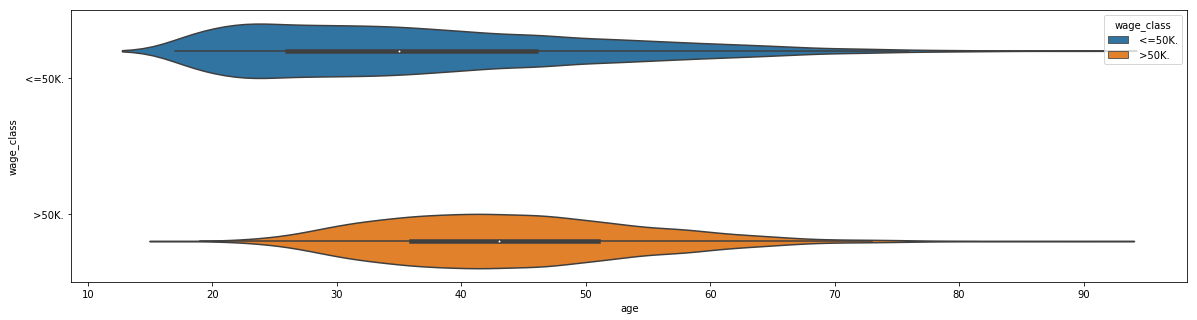

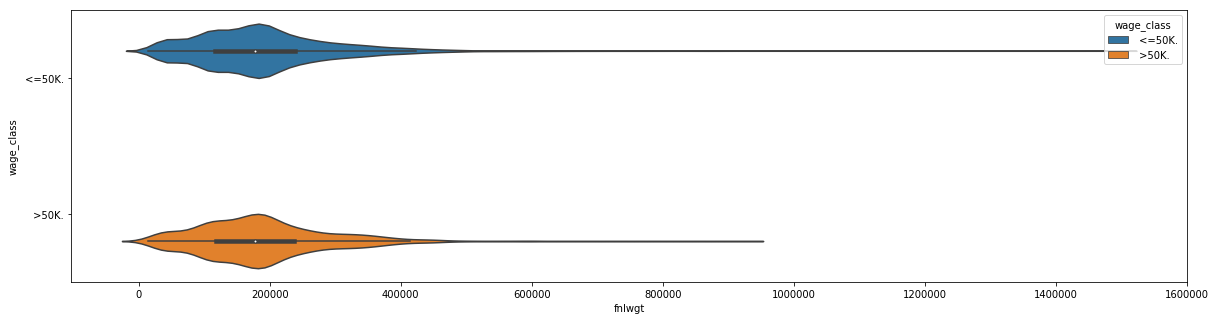

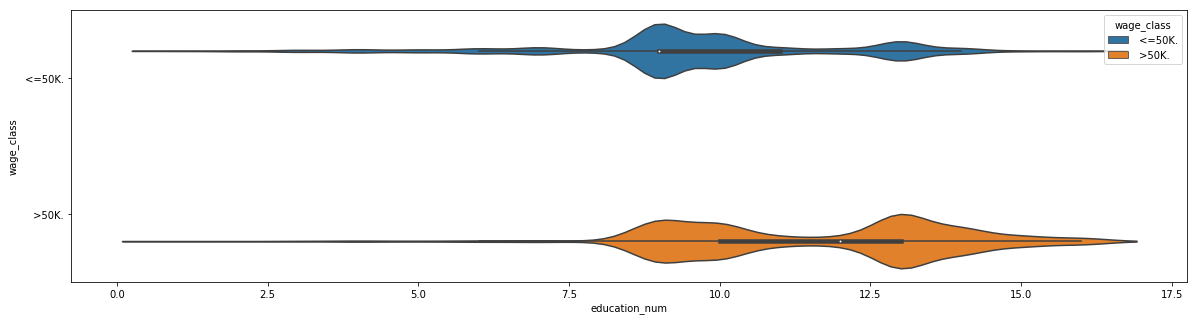

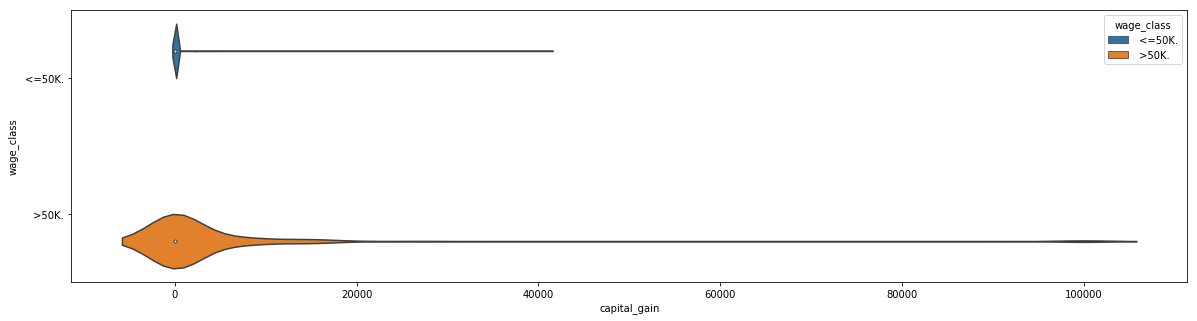

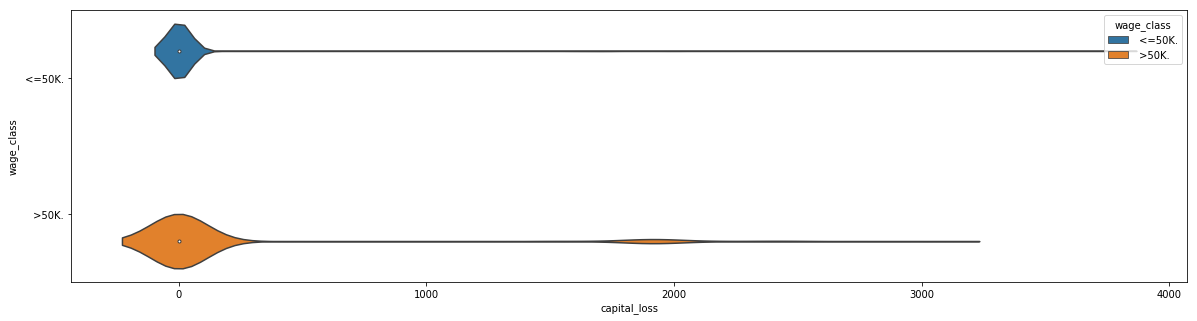

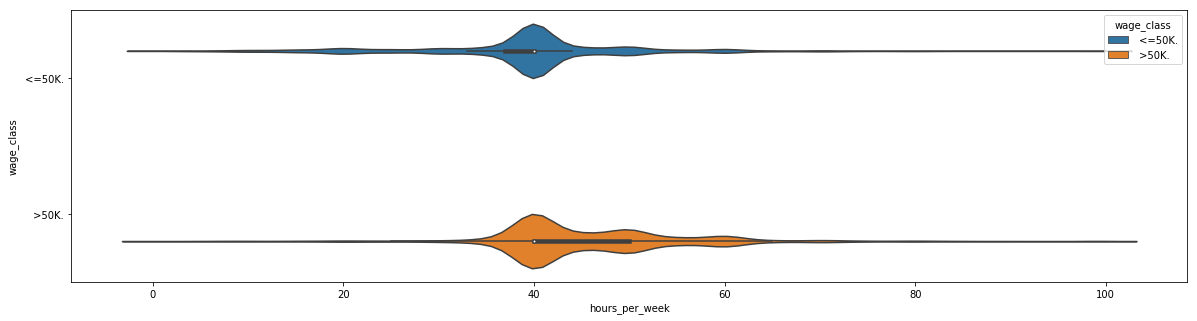

In [54]:
for i, col in enumerate(num_cols):
    plt.figure(i,figsize = (20,5))
    sns.violinplot(x=col,y='wage_class', data=test_set,hue="wage_class")

In [55]:
#changing wage_class categorical data into numerical data
train_set['wage_class'] = train_set['wage_class'].replace({'<=50K': 0, '>50K':1}, regex=True)

test_set['wage_class'] = test_set['wage_class'].replace({'<=50K': 0, '>50K':1}, regex=True)

In [56]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [57]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


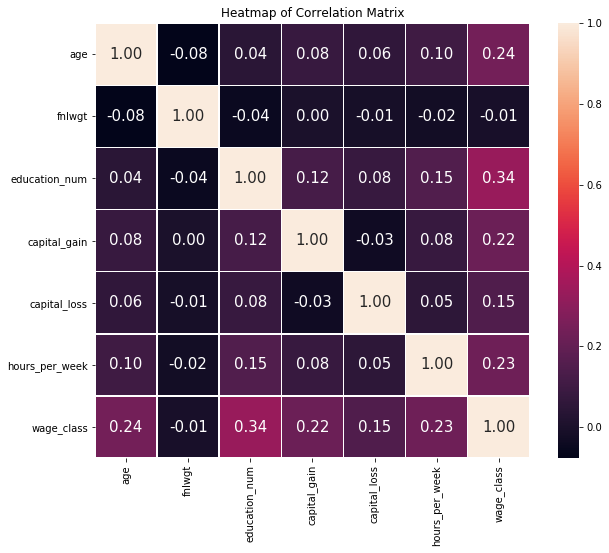

In [58]:
#Check the co-realation between the Numerical columsn with the Wage_Class using heat map visualization
#need to know the correlation between the Numerical variables
#['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'wage_class']
plt.figure(figsize=(10,8))

sns.heatmap(train_set.corr(), cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 15}) 
plt.title('Heatmap of Correlation Matrix')
plt.show()



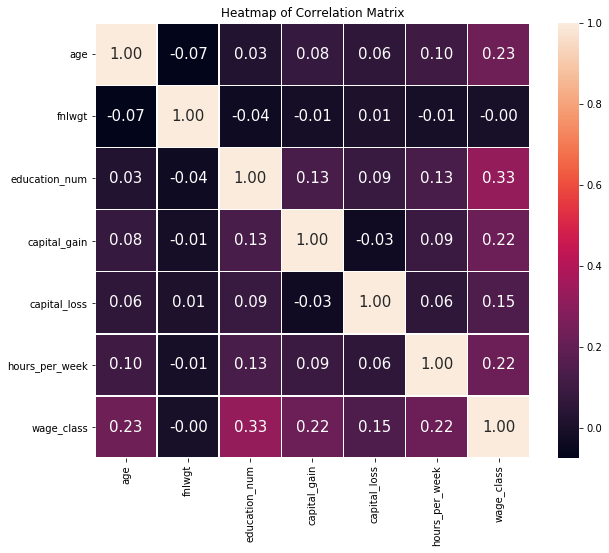

In [59]:
plt.figure(figsize=(10,8))

sns.heatmap(test_set.corr(), cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 15}) 
plt.title('Heatmap of Correlation Matrix')
plt.show()


#### as per the above heat map education_num,age,hours-peak,capital_gain are the high co related to Wage_class

In [60]:
#change all categgorical varibles into numerical variables
# Encode the categorical features as numbers
from sklearn.preprocessing import LabelEncoder
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [61]:
train_set, _ = number_encode_features(train_set)

In [62]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [63]:
test_set, _ = number_encode_features(test_set)

In [64]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


In [65]:
#spliting the data as Feature and Target Variable

#X_train, X_test, y_train, y_test
X_train = train_set.drop('wage_class', axis =1)
y_train = train_set['wage_class']
X_test = test_set.drop('wage_class', axis =1)
y_test = test_set['wage_class']

features_list=X_train.columns 

In [66]:
print(features_list)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')


In [67]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((30162, 14), (30162,), (15060, 14), (15060,))

In [68]:
###XG boost alogrithm, beacuse ther is no scaling is required 
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [69]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10785   575]
 [ 1510  2190]]


In [70]:
#score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Classification Report:\n ",classification_report(y_test, y_pred))
xgscore=accuracy_score(y_test,y_pred)

print("Score is",xgscore)

Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.59      0.68      3700

avg / total       0.86      0.86      0.85     15060

Score is 0.8615537848605578


In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [72]:
X_train

array([[ 0.04279571,  2.93600035, -1.0627216 , ..., -0.21858598,
        -0.07773411,  0.26492394],
       [ 0.88028814,  1.88768202, -1.00787131, ..., -0.21858598,
        -2.3315307 ,  0.26492394],
       [-0.03333996, -0.20895464,  0.24469349, ..., -0.21858598,
        -0.07773411,  0.26492394],
       ...,
       [ 1.48937355, -0.20895464, -0.3585745 , ..., -0.21858598,
        -0.07773411,  0.26492394],
       [-1.25151078, -0.20895464,  0.11070545, ..., -0.21858598,
        -1.74721307,  0.26492394],
       [ 1.0325595 ,  0.83936369,  0.92884082, ..., -0.21858598,
        -0.07773411,  0.26492394]])

In [73]:
X_test

array([[-1.02310375, -0.20895464,  0.35028622, ..., -0.21858598,
        -0.07773411,  0.10113106],
       [-0.03333996, -0.20895464, -0.94631973, ..., -0.21858598,
         0.75700537,  0.10113106],
       [-0.79469672, -1.25727297,  1.39285818, ..., -0.21858598,
        -0.07773411,  0.10113106],
       ...,
       [-0.03333996, -0.20895464,  1.75283509, ..., -0.21858598,
         0.75700537,  0.10113106],
       [ 0.42347409, -0.20895464, -1.00238155, ..., -0.21858598,
        -0.07773411,  0.10113106],
       [-0.26174699,  0.83936369, -0.07236863, ..., -0.21858598,
         1.59174484,  0.10113106]])

In [74]:
classification=["Logistic Regression","Decision Tree","Random Forest","KNeighbour"]

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
da = pd.DataFrame(np.arange(len(classification)).reshape(1,len(classification)), columns=classification,index=['Test Accuracy'])

for classificationAlg in classification:
    print(classificationAlg)
    if classificationAlg=="Logistic Regression":
        from sklearn.linear_model import LogisticRegression
        classifier=LogisticRegression()
        classifier.fit(X_train,y_train)
        y_predict=classifier.predict(X_test)
          
    if classificationAlg=="Decision Tree":
        from sklearn.tree import DecisionTreeClassifier
        classifier=DecisionTreeClassifier(criterion='entropy')
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
           
    if classificationAlg=="Random Forest":
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 5,random_state=0)
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
         
    if classificationAlg=="KNeighbour":
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors=5)
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
         
    print("\n Classification Algorithm Name is: ",classificationAlg)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    print("\n Classification Report:\n ",classification_report(y_test, y_pred))
    score=accuracy_score(y_test,y_pred)

    print("Score is:",score)
    da.loc[:,classificationAlg] =score
#highlight_max=dfi.max()    
print("\n",da)



Logistic Regression

 Classification Algorithm Name is:  Logistic Regression
[[10785   575]
 [ 1510  2190]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.59      0.68      3700

avg / total       0.86      0.86      0.85     15060

Score is: 0.8615537848605578
Decision Tree

 Classification Algorithm Name is:  Decision Tree
[[9927 1433]
 [1435 2265]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.87      0.87      0.87     11360
          1       0.61      0.61      0.61      3700

avg / total       0.81      0.81      0.81     15060

Score is: 0.8095617529880478
Random Forest

 Classification Algorithm Name is:  Random Forest
[[10267  1093]
 [ 1446  2254]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.90      0.89     11360
          1       0.67      

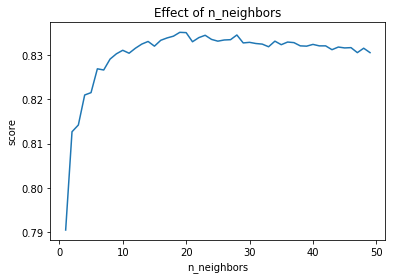

In [76]:
#performance Tuning changing the neighbours in KNeighbour algorithms

#changing the estimator to know at what point we get to the good RMSE
n = np.arange(1,50,1)
scores = []
for i in n:
    classifier = KNeighborsClassifier(n_neighbors=i)
    #regressor.set_params(n_neighbors=n)
    classifier.fit(X_train, y_train)
    #y_predict = regressor.predict(X_test)
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
    scores.append(classifier.score(X_test, y_test))
    #print(n)
plt.title("Effect of n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(n, scores)


#### As per the above graph we are getting high accuracy at the n_neighbors=19

In [77]:
classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
#print("\n Classification Algorithm Name is: ",classificationAlg)
cm = confusion_matrix(y_test, y_pred)
print(cm)
    
print("\n Classification Report:\n ",classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)

print("Score is:",score)

#updating the accuracy matrix
da["KNeighbour"]=score
print(da)

[[10433   927]
 [ 1556  2144]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.87      0.92      0.89     11360
          1       0.70      0.58      0.63      3700

avg / total       0.83      0.84      0.83     15060

Score is: 0.8351261620185922
               Logistic Regression  Decision Tree  Random Forest  KNeighbour
Test Accuracy             0.861554       0.809562       0.831408    0.835126


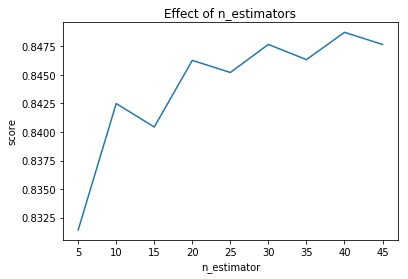

In [78]:
#changing the estimator to know at what point we get to the good accuracy
estimators = np.arange(5, 50, 5)
scores = []
for n in estimators:
    classifier = RandomForestClassifier(n_estimators = n,random_state=0)
    classifier.set_params(n_estimators=n)
    classifier.fit(X_train, y_train)
    #y_predict = regressor.predict(X_test)
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
    scores.append(classifier.score(X_test, y_test))
    #print(n)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)


#### as per the above graph we are getting high accuracy at the n_estimators=40

In [79]:
classifier = RandomForestClassifier(n_estimators = 40,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
#print("\n Classification Algorithm Name is: ",classificationAlg)
cm = confusion_matrix(y_test, y_pred)
print(cm)
    
print("\n Classification Report:\n ",classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)

print("Score is:",score)

#updating the accuracy matrix
da["Random Forest"]=score
print(da)

[[10523   837]
 [ 1441  2259]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.93      0.90     11360
          1       0.73      0.61      0.66      3700

avg / total       0.84      0.85      0.84     15060

Score is: 0.8487383798140771
               Logistic Regression  Decision Tree  Random Forest  KNeighbour
Test Accuracy             0.861554       0.809562       0.848738    0.835126


In [83]:
df=da
#adding xgboost accuary values into Test accuaracy matrix
#df.insert(2,"XGBoost", xgscore) 
da["XGBoost"]=xgscore

In [84]:
print(da)

               Logistic Regression  Decision Tree  Random Forest  KNeighbour  \
Test Accuracy             0.861554       0.809562       0.848738    0.835126   

                XGBoost  
Test Accuracy  0.861554  


In [85]:
# Get to know the feature importances
classifier = RandomForestClassifier(n_estimators = 40,random_state=0)
classifier.fit(X_train, y_train)
#print(classifier.feature_importances_)
# Get numerical feature importances
importances = list(classifier.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]
feature_importances

[('age', 0.15),
 ('workclass', 0.04),
 ('fnlwgt', 0.17),
 ('education', 0.03),
 ('education_num', 0.09),
 ('marital_status', 0.07),
 ('occupation', 0.07),
 ('relationship', 0.1),
 ('race', 0.01),
 ('sex', 0.01),
 ('capital_gain', 0.12),
 ('capital_loss', 0.04),
 ('hours_per_week', 0.08),
 ('native_country', 0.02)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

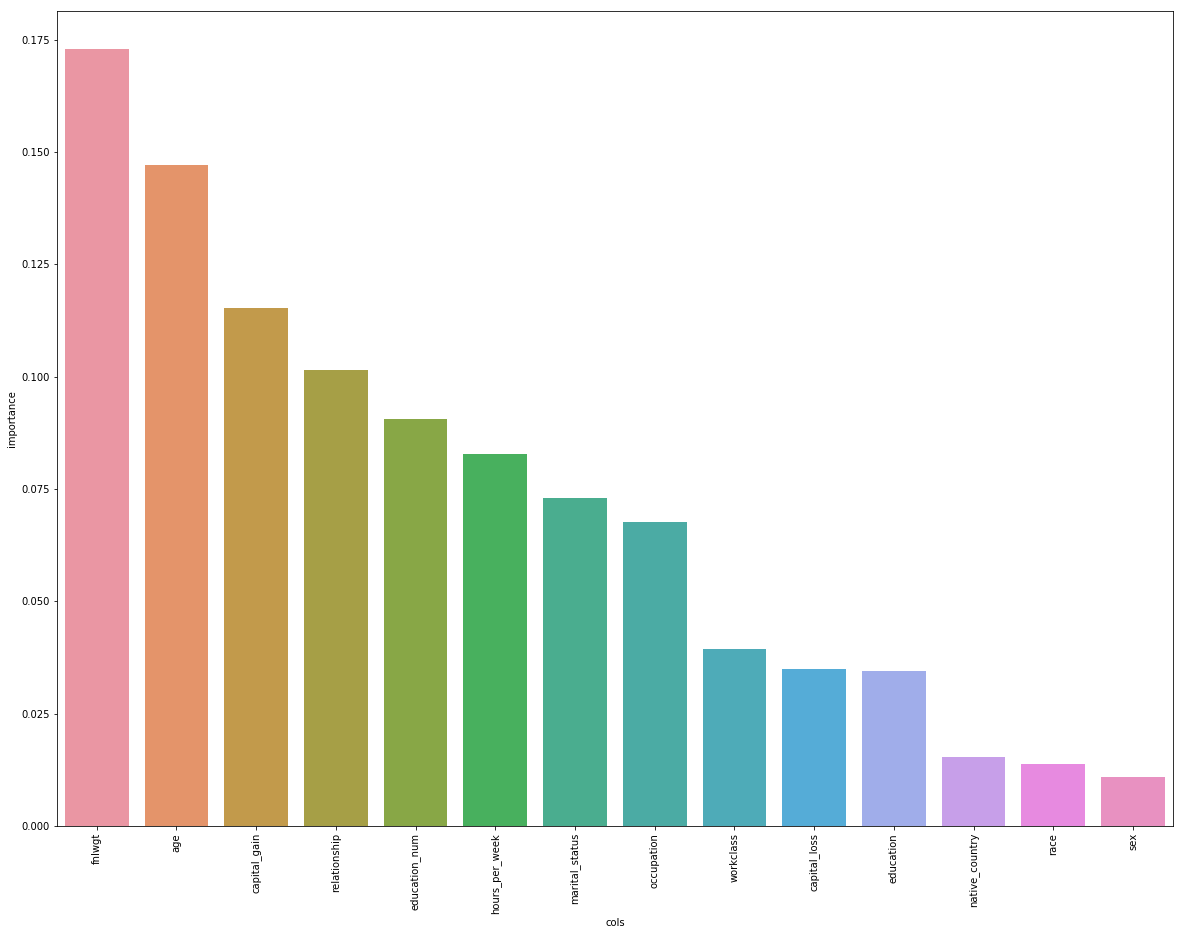

In [86]:
importance = pd.DataFrame.from_dict({'cols':features_list, 'importance': classifier.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [87]:
imp_cols = importance[importance.importance >= 0.05].cols.values
imp_cols

array(['fnlwgt', 'age', 'capital_gain', 'relationship', 'education_num',
       'hours_per_week', 'marital_status', 'occupation'], dtype=object)

In [88]:
da

,Logistic Regression,Decision Tree,Random Forest,KNeighbour,XGBoost
Test Accuracy,0.861554,0.809562,0.848738,0.835126,0.861554


In [90]:
#dFold = pd.DataFrame(np.arange(len(classification)).reshape(1,len(classification)), columns=classification,index=['Test Accuracy'])

classifications = [
            ("Logistic Regression", LogisticRegression()),
            ("Decision Tree ",  DecisionTreeClassifier()),
            ("Random Forest",  RandomForestClassifier(n_estimators=40)),
            ("KNeighbour",  KNeighborsClassifier(19)),
            ("XGBoost", xgboost.XGBClassifier())]

dFold = pd.DataFrame(index=['Test Accuracy'])

from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict

#classification=["Logistic Regression","Decision Tree","Random Forest","KNeighbour","XGBoost"]
#classifiers=[]
scoring = 'accuracy'
results=[]
names=[]
#kfold = KFold(n_splits=10, random_state=100)
for classifier_name,model in classifications:
    accuracy =cross_val_score(model, X_train,y_train, cv=10,scoring='accuracy').mean()
    dFold[classifier_name] =accuracy
    print(classifier_name,"\n\t Accuracy :", accuracy)

Logistic Regression 
	 Accuracy : 0.8204038443535454
Decision Tree  
	 Accuracy : 0.8037605561758957
Random Forest 
	 Accuracy : 0.8517016132671804
KNeighbour 
	 Accuracy : 0.8330353497585294


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

XGBoost 
	 Accuracy : 0.8596915714294449


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [91]:
dFold

,Logistic Regression,Decision Tree,Random Forest,KNeighbour,XGBoost
Test Accuracy,0.820404,0.803761,0.851702,0.833035,0.859692


#### As per the above analysis XGBosst give higher prediction for the given dataset